# SVD를 이용한 행렬 분해 실습 및 NMF(Non Negative Matrix Factorization)의 이해

# SVD(Singular Value Decomposition) - 특이값 분해
- SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 M*N 행렬도 분해 가능
![대체 텍스트](https://i.imgur.com/lP44bGq.png)

 SVD 개요

In [1]:
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


SVD 행렬 분해

In [4]:
U, Sigma, Vt = svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


분해된 행렬들을 이용하여 다시 원행렬로 원복

In [5]:
# Sigma를 다시 0을 포함한 대치행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


## Compact SVD
- 비대각 부분과 대각 원서가 0인 부분을 제거



데이터 의존도가 높은 원본 데이터 행렬 생성

In [8]:
a[2] =a[0] + a[1]
a[3] =a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [11]:
# 다시 SVD를 수행하여 Sigma 값 확인
U,Sigma,Vt = svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [15]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape,Vt_.shape)
# U, Sigma, Vt의 내적을 수행하여, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


## Truncated SVD
- 대각 원소 가운데 상위 r개만 추출하여 차원축소

### Truncated SVD 행렬 분해 의미 -> To find a latent factor
- SVD는 차원 축소를 위한 행렬 분해를 통해 Latent Factor(잠재 요인)를 찾을 수 있는데, 이렇게 찾아진 Latent Factor는 많은 분야에 활용(추천 엔진, 문서의 잠재 의미 분석 등)
- SVD로 차원 축소 행렬 분해된 후 다시 분해된 행렬을 이용하여 원복된 데이터 셋은 잡음(Noise)이 제거된 형태로 재 구성될 수 있음.(원본 데이터도 손실이 됨)
- 사이킷런에서는 Truncated SVD로 차워을 축소할 때 원본 데이터에 U*시그마 적용

![대체 텍스트](https://people.csail.mit.edu/karger/Talks/AMS/img018.GIF)

- Truncated SVD를 이용한 행렬 분해

In [25]:
import numpy as np
from scipy.sparse.linalg import svds # 희소행렬에서만 지원
                                     #희소행렬(sparse matrix)은 행렬의 값이 대부분 0인 경우를 가리키는 표현
from scipy.linalg import svd

#원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix,full_matrices=False)
print('\n분해 행렬 차원:',U.shape,Sigma.shape,Vt.shape)
print('\nSigma값 행렬:',Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components =4 # n_components가 커질수록 원본값과 비슷하게 원복됨.
U_tr,Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\nTruncated분해 행렬 차원:',U_.shape,Sigma_.shape,Vt_.shape)
print('\nTruncated SVD Sigma값 행렬:',Sigma_)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr) #outpout of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬 :\n',matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated분해 행렬 차원: (4, 2) (2, 2) (2, 4)

Truncated SVD Sigma값 행렬: [[2.66335286 0.        ]
 [0.         0.80703506]]

Truncated SVD로 분해 후 복원 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.726732

#### 사이킷런 TrunatedSVD클래스를 이용한 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

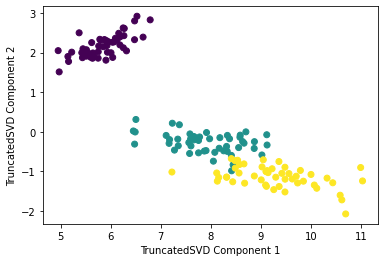

In [28]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0],y = iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

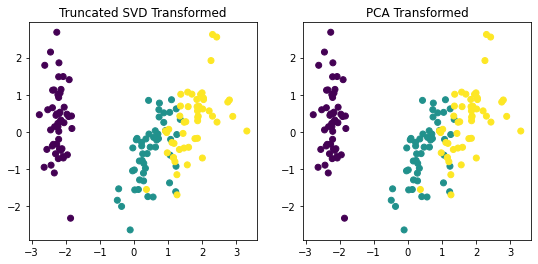

In [30]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

#스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

#스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1,ax2) = plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

# NMF(Non Negative Matrix Factorization)
NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는게 보장되면 다음과 같이 좀 더 간단하게 두개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭

![대체 텍스트](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F990F9B405A3923AF21)

**NMF**

Text(0, 0.5, 'NMF Component 2')

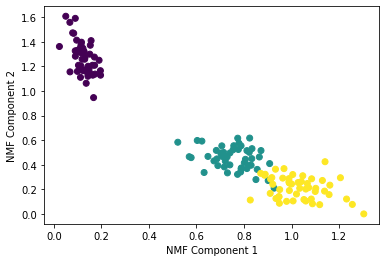

In [31]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_fts = iris.data
nmf = NMF(n_components = 2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x= iris_nmf[:,0],y=iris_nmf[:,1],c = iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

# 행렬 분해(Matrix Factorization)
행렬 분해는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것. 이처럼 행렬 분해를 하게 되면 W 행렬과 H 행렬은 일반적으로 길고 가는 행렬 W(원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬)와 작고 넓은 행렬 H(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해된다. 이렇게 분해된 행렬은 Latent Factor(잠재요소)를 특성으로 가지게 된다. 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬이다.

![대체 텍스트](https://mmolano.files.wordpress.com/2014/10/nmf.png)